<a href="https://colab.research.google.com/github/BotenAqua/MetodyNumeryczne/blob/master/Lista_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Optimization terminated successfully.
         Current function value: -1.000000
         Iterations: 35
         Function evaluations: 66


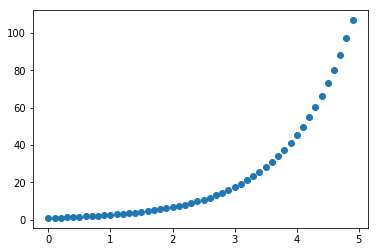

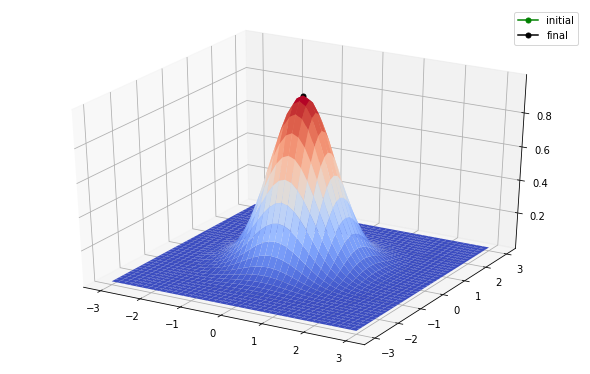

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

###Euler method

# parameters
T = 5
h = 0.1

# x' = ax
a = 1
initial_x = 1

t = np.arange(0,T,h)
x = np.zeros(t.shape)
x[0] = initial_x

for i in range(t.size-1):
    x[i+1] = x[i] + h * (1 * x[i])

#plt.plot(t,x,'o')
# plt.xlabel('t', fontsize=14)
# plt.ylabel('x', fontsize=14)
# plt.show()

# parametry symulacji
T = 20
h = 0.1

# parametry modelu x'' + ax' + bx = 0
a, b = 0, 1
initial_x, initial_y = 1.0, 0.0

t = np.arange(0,T,h)
x = np.zeros(t.shape)
y = np.zeros(t.shape)
x[0], y[0] = initial_x, initial_y

for i in range(t.size-1):
    x[i+1] = x[i] + h*(y[i])
    y[i+1] = y[i] + h*(-b*x[i] - a*y[i])

# plt.plot(t,x,'k', label='x')
# plt.plot(t,y,'g', label='y')
# plt.xlabel('t', fontsize=14)
# plt.ylabel('state', fontsize=14)
# plt.legend(loc='upper right', fontsize=14)
# plt.show()

# skorygowany schemat Eulera
T = 20
h = 0.1

# parametry modelu x'' + ax' + bx = 0
a, b = 0, 1
initial_x, initial_y = 1.0, 0.0

t = np.arange(0,T,h)
x = np.zeros(t.shape)
y = np.zeros(t.shape)
x[0], y[0] = initial_x, initial_y

for i in range(t.size-1):
    x[i+1] = x[i] + h*(y[i])
    y[i+1] = y[i] + h*(-b*x[i+1] - a*y[i])

# plt.plot(t,x,'k', label='x')
# plt.plot(t,y,'g', label='y')
# plt.xlabel('t', fontsize=14)
# plt.ylabel('state', fontsize=14)
# plt.legend(loc='upper right', fontsize=14)
# plt.show()

# Differential equations

def F(x, t):
    dx = [0, 0]
    dx[0] = x[1]
    dx[1] = -x[0]-0.5*x[1]
    return dx

t_min = 0
t_max = 20
h = 0.01
t = np.arange(t_min, t_max+h, h)

initial_x = ((1,0))

# X = odeint(F, initial_x, t)
# plt.figure(1)
# plt.plot(t,X)
# plt.figure(2)
# plt.plot(X[:,0],X[:,1])
# plt.axis('equal')
# plt.show()

# Optimizing exponential
from scipy import linspace , cos , exp, random, meshgrid, zeros
from scipy.optimize import fmin
from matplotlib.pyplot import plot, show, legend, figure, cm, contour, clabel
def f(x):
    return exp(-x[0] ** 2 - x[1] ** 2)


def neg_f(x):
    return -f(x)

x0 = random.randn(2)
x_min = fmin(neg_f, x0)

from mpl_toolkits.mplot3d import Axes3D

delta = 3
x_knots = linspace(x_min[0] - delta, x_min[0] + delta, 41)
y_knots = linspace(x_min[1] - delta, x_min[1] + delta, 41)
X, Y = meshgrid(x_knots, y_knots)
Z = zeros(X.shape)
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        Z[i][j] = f([X[i, j], Y[i, j]])

ax = Axes3D(figure(figsize=(8, 5)))
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0.4)
ax.plot([x0[0]], [x0[1]], [f(x0)], color='g', marker='o', markersize=5, label='initial')
ax.plot([x_min[0]], [x_min[1]], [f(x_min)], color='k', marker='o', markersize=5, label='final')
ax.legend()
show()



In [0]:
import matplotlib.pyplot as plt
import scipy.integrate as sint

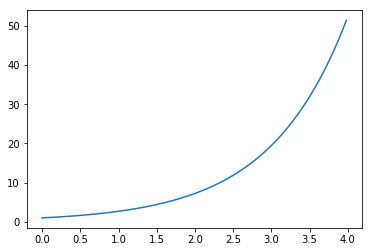

In [4]:
# TASKS (9p)
#1 Looking at the Euler method above create your own function which takes:
# a (from x' = ax)
# h - step
# T time range
# as an input and plots the solution of a differential equation x' = ax (1p)

def euler(a, h, T):
  
  x = np.arange(0,T,h)
  y = [1]
  
  for i in range(len(x)-1):
    y.append(y[-1] + h * y[-1])
  plt.plot(x,y)
  plt.show()
  
  return



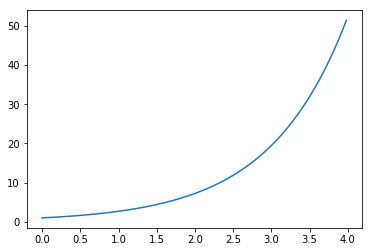

In [6]:
euler(3,0.02,4)

In [0]:
#2 Beside the solution print the 'ideal' approximation on your chart using for example green color as a reference. (1p)
#2 Hint: use small step value. Use plt.legend to explain which serie is the 'ideal'

def euler2(a, h, T, h_ideal = 0.0001):
  
  x = np.arange(0,T,h)
  y = [1]
  for i in range(len(x)-1):
    y.append(y[-1] + h * y[-1])
  
  x_ideal = np.arange(0,T,h_ideal)
  y_ideal = [1]
  for i in range(len(x_ideal)-1):
    y_ideal.append(y_ideal[-1] + h_ideal * y_ideal[-1])
  
  
  plt.plot(x, y, label = "dla h = %f" %(h))
  plt.plot(x_ideal, y_ideal, color = "green", label = "dla h = %f" %(h_ideal))
  
  
  plt.legend()
  plt.show()
  
  return

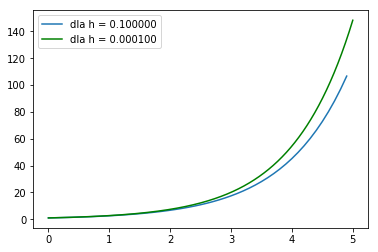

In [25]:
euler2(4,0.1,5)

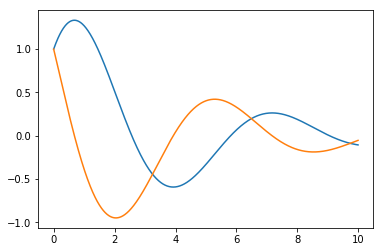

In [32]:
#3 Find a differential equation which represents a process / model (your choice) and implement it using odeint python function (1p)

def fun(x, t):
    dx = [0, 0]
    dx[0] = x[1]
    dx[1] = -x[0]-0.5*x[1]
    return dx

h3 = 0.01
czas = np.arange(0,10,h3)
xp = ((1,1))

x_ode = sint.odeint(fun, xp, czas)

plt.plot(czas, x_ode)
plt.show()

In [0]:
#4 Look at the example of optimization for exponential function.
# Did you encounter any errors? Where in code do we display the optimal point? Do we minimize or maximize and which function?
# Start your search always from the point (0, -2). (1p)

In [0]:
#5 Create your own 3d function with multiple local optima.
# Create an algorithm which takes an initial point and looks for the closest local optimum (1p)
# Create an algorithm which aims to find a global optimum, the time of execution is limiter to ~30sec (1p)
# If your solution is heuristic test its quality. Measure the probability of finding the GLOBAL optimum (1p).
# You can, for example, execute your search function multiple times and check if the returned result is what you expected.
# Measure the success / total trials rate (2p).